In [15]:
# -*- coding: utf-8 -*-
local_path = './'

"""## Prepare fastai"""
from fastai import *
from fastai.text import *
from fastai.metrics import *

"""## Prepare Dataset"""
local_project_path = local_path + 'dna-10class/'
if not os.path.exists(local_project_path):
  os.makedirs(local_project_path)
print('local_project_path:', local_project_path)

"""## Create Language Model"""
class dna_tokenizer(BaseTokenizer):
  def tokenizer(slef, t):
    return list(t)
tokenizer = Tokenizer(tok_func=dna_tokenizer, pre_rules=[], post_rules=[], special_cases=[])
processor = [TokenizeProcessor(tokenizer=tokenizer, include_bos= False, include_eos=False), NumericalizeProcessor(max_vocab=30000)]
# batch size
bs = 128
data_lm = TextLMDataBunch.from_csv(local_project_path, 'combined.csv',
                                   text_cols ='Text', valid_pct= 0.1, tokenizer=tokenizer,
                                   include_bos= False, include_eos=False)

print('data_cls validation set size', len(data_lm.valid_ds))
learn_lm = language_model_learner(data_lm, TransformerXL, drop_mult=0.3, pretrained=False).to_fp16()



data_cls validation set size 2658


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


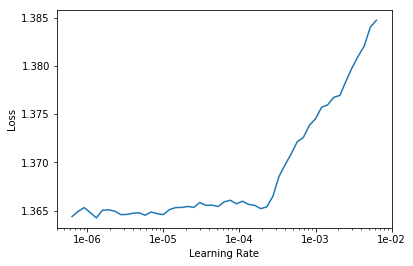

In [10]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end = 15)

In [16]:
learn_lm.load('lm-fine-tuned-transformer-10-1-1_a3');

In [12]:
learn_lm.validate(metrics=[accuracy])

[1.3529806, tensor(0.3391)]

In [7]:
TEXT = "atggcag"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

atggcag g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g g
atggcag g g xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxeos xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake xxfake y y


In [11]:
TEXT = "atggcag"
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

atggcag a g c t t g t g a c g g g c g a c t c g a c t t g c c g c c g t t g a t g g g c
atggcag t a a g a t c t t g t c c c t a t g c c c t t a g t g a g a t c t g a t t t a g


In [ ]:
learn_lm.fit_one_cycle(1, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
